In [40]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [41]:
import sys 
sys.path.append('../scripts')
from eda_functions import load_data
from descriptiveplot import top_publishers, headline_length_distribution, publication_trends_over_time, top_stock_mentions


In [42]:
df = load_data('../data/raw_analyst_ratings.csv')

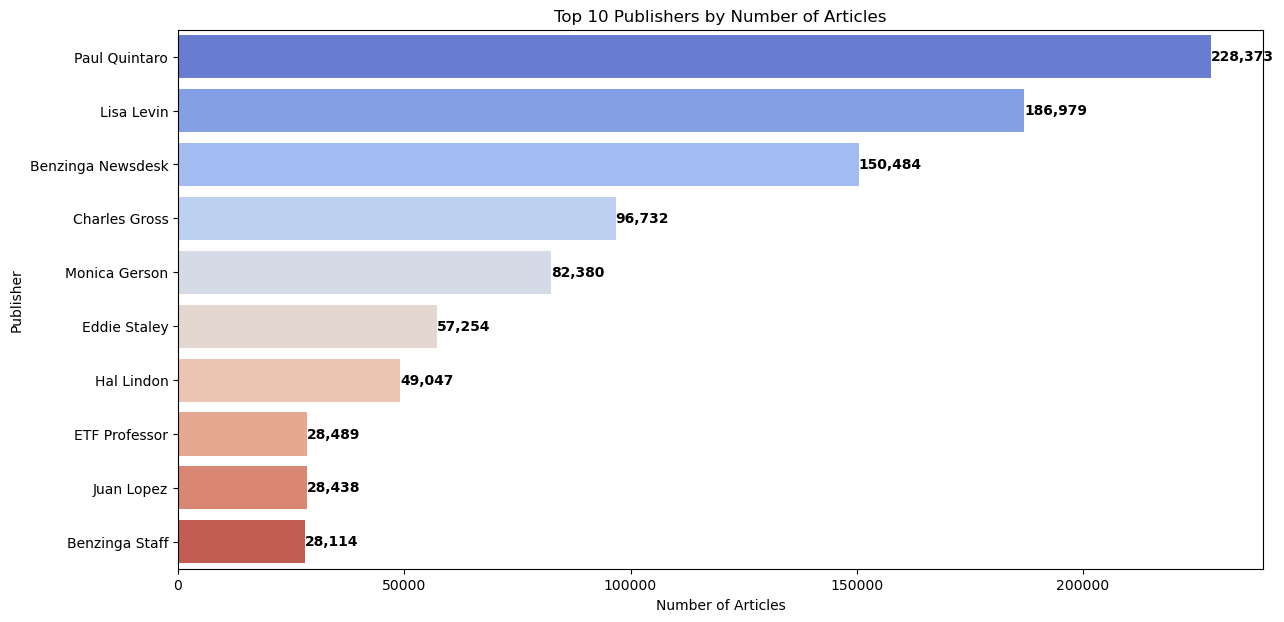

In [44]:
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts().head(10)

# Plot the top 10 publishers by number of articles
plt.figure(figsize=(14, 7))
barplot = sns.barplot(x=publisher_counts.values, y=publisher_counts.index, palette='coolwarm')

# Add values on top of each bar
for index, value in enumerate(publisher_counts.values):
    plt.text(value, index, f'{value:,}', va='center', ha='left', fontweight='bold')

plt.title('Top 10 Publishers by Number of Articles')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.show()


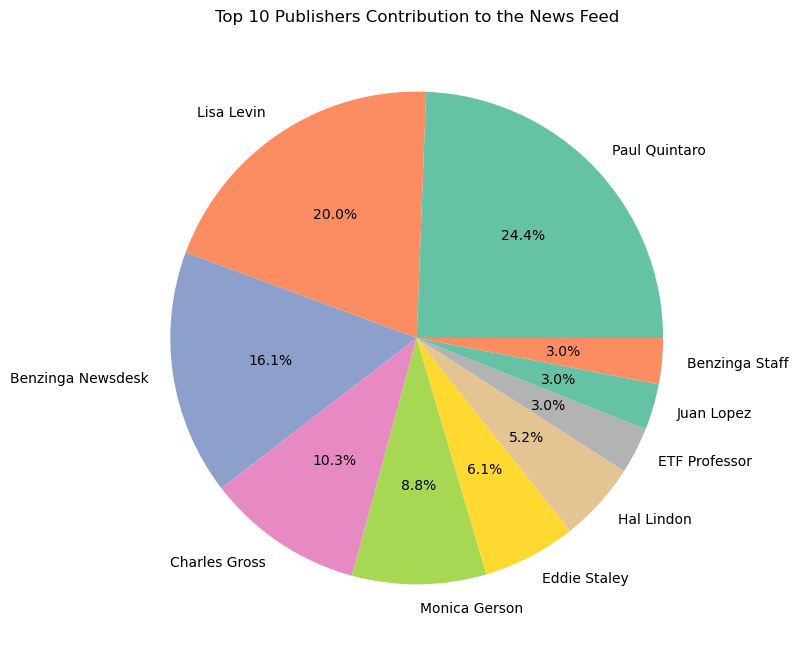

In [46]:
# Plot a pie chart of the top 10 publishers' contributions
plt.figure(figsize=(12, 8))
plt.pie(publisher_counts, labels=publisher_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2', len(publisher_counts)))
plt.title('Top 10 Publishers Contribution to the News Feed')
plt.show()


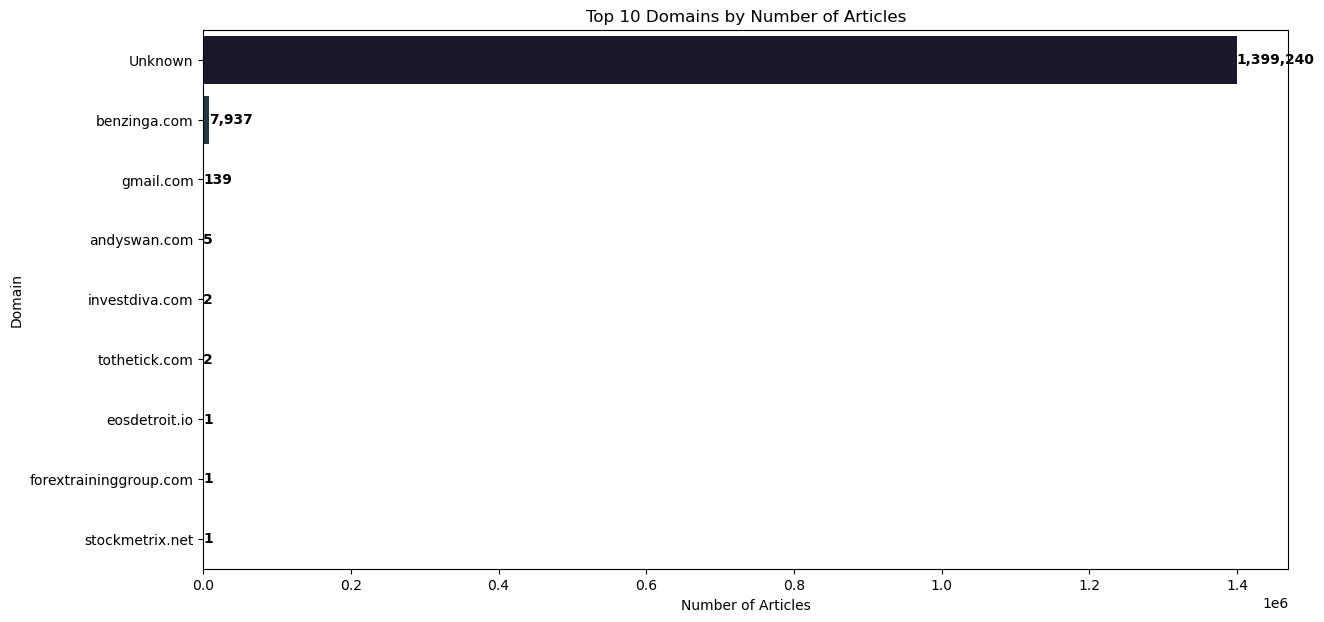

In [45]:
# Extract the domain from email-like publisher names
df['publisher_domain'] = df['publisher'].apply(lambda x: x.split('@')[-1] if '@' in x else 'Unknown')

# Count the number of articles per domain
domain_counts = df['publisher_domain'].value_counts().head(10)

# Plot the top 10 domains by number of articles
plt.figure(figsize=(14, 7))
barplot = sns.barplot(x=domain_counts.values, y=domain_counts.index, palette='cubehelix')

# Add values on top of each bar
for index, value in enumerate(domain_counts.values):
    plt.text(value, index, f'{value:,}', va='center', ha='left', fontweight='bold')

plt.title('Top 10 Domains by Number of Articles')
plt.xlabel('Number of Articles')
plt.ylabel('Domain')
plt.show()


C:\Users\Dave\AppData\Local\Temp\ipykernel_23620\884803614.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_publishers['publication_date'] = df_top_publishers['date']


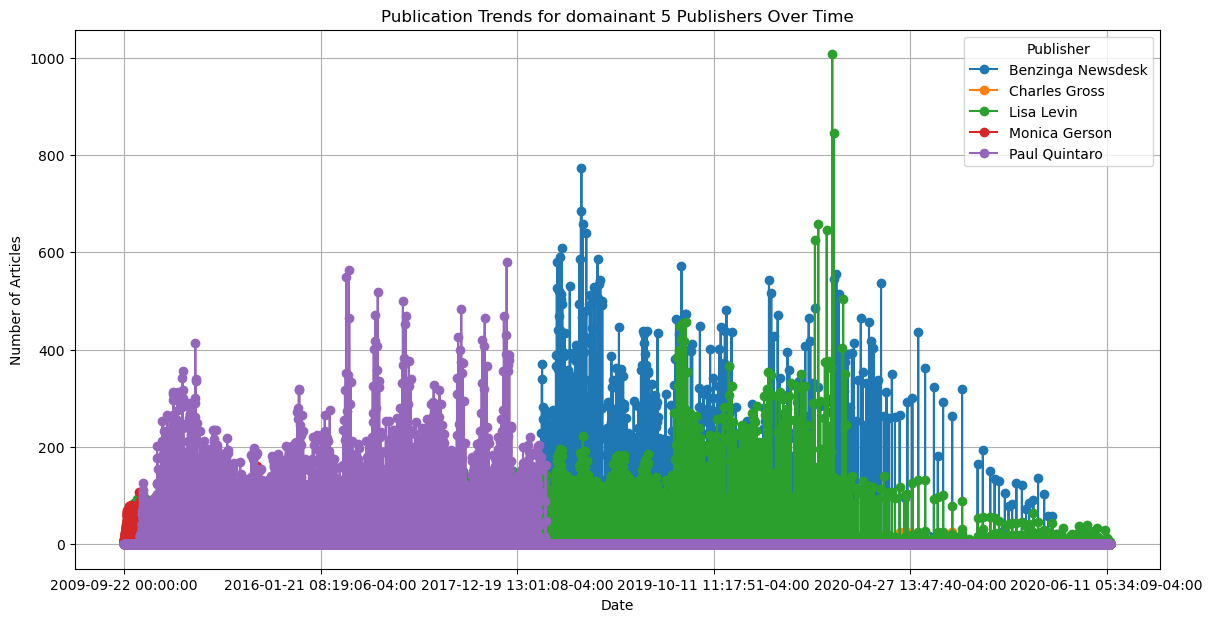

In [47]:
# Select the top 5 publishers
top_5_publishers = df['publisher'].value_counts().head(5).index

# Filter the DataFrame for only the top 5 publishers
df_top_publishers = df[df['publisher'].isin(top_5_publishers)]

# Group by date and publisher, then count the articles
df_top_publishers['publication_date'] = df_top_publishers['date']
publisher_trends = df_top_publishers.groupby(['publication_date', 'publisher']).size().unstack().fillna(0)

# Plot the publication trends for the top 5 publishers over time
plt.figure(figsize=(14, 7))
publisher_trends.plot(ax=plt.gca(), marker='o')
plt.title('Publication Trends for domainant 5 Publishers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.legend(title='Publisher')
plt.show()


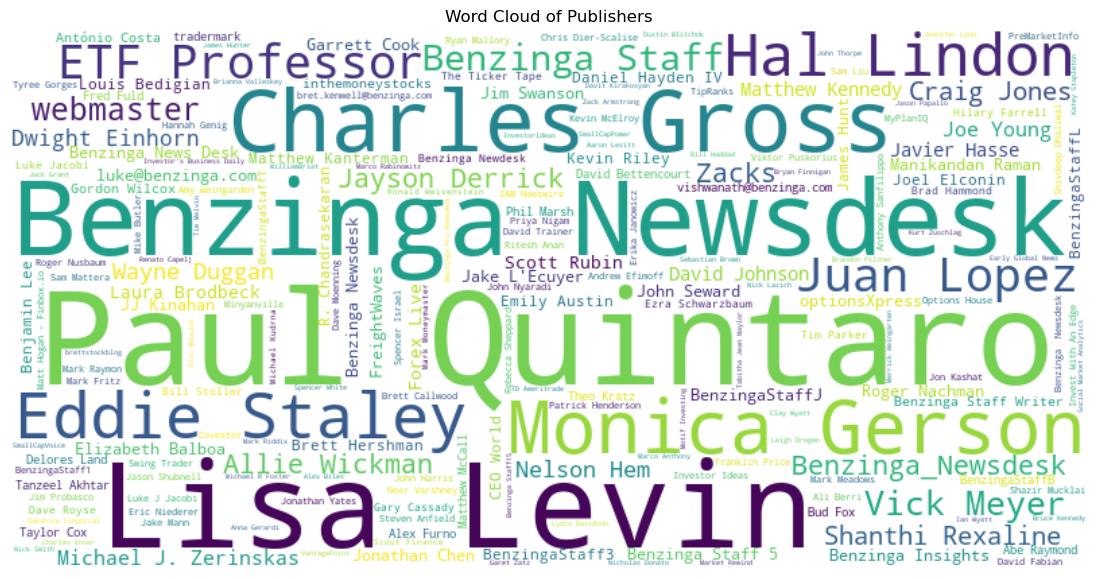

In [36]:
# Generate a word cloud of publisher names
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(df['publisher'].value_counts())

# Display the word cloud
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Publishers')
plt.show()